In [1]:
%reload_ext autotime
import pandas as pd
import requests
from pprint import pprint
import json5 as json # This is a more forgiving JSON parser that can handle comments, single quotes, and trailing commas
import torch
from PIL import Image
from tqdm.auto import tqdm
pd.options.plotting.backend = "plotly"
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 100)

time: 2.16 s (started: 2025-06-25 12:26:34 +12:00)


In [5]:
df = pd.read_excel("givealittle_health.xlsx")
def get_text(row):
  text = ""
  if not pd.isna(row["title"]):
    text += "Title: " + row["title"] + "\n"
  if not pd.isna(row["pitch"]):
    text += "Pitch: " + row["pitch"] + "\n"
  if not pd.isna(row["description"]): # Description includes use_of_funds
    text += "Description: " + row["description"] + "\n"
  if not pd.isna(row["updates"]):
    text += "Updates: " + row["updates"] + "\n"
  if not pd.isna(row["location"]):
    text += "Location: " + row["location"] + "\n"
  return text.strip()

df["text"] = df.apply(get_text, axis=1)
df

,title,pitch,hero,uri,amountRaised,goal,timeLeft,action,actionUri,start,end,n_questions,location,n_donors,description,use_of_funds,whos_involved,moderated,n_updates,updates,Q&A,text
0,"Rugby league lover, Ben Stowers, has had his whole life turned upside down from one tackle.","This page has been started to help Ben, his partner and their families with the financial impact...",https://static.givealittle.co.nz/assets/hero/82a33c79-46e8-4c6c-ad1a-b2f7010ebbc2-320:False,https://givealittle.co.nz/cause/rugby-league-lover-ben-stowers-has-had-his-whole,3070.0,0.0,362 days to go,Donate,https://givealittle.co.nz/donate/cause/rugby-league-lover-ben-stowers-has-had-his-whole,9 Jun 2025,8 Jun 2026,0,"Porirua, Wellington",52.0,"On the 22nd of March Ben's life took a turn for the worse, playing the sport he loved - Rugby Le...","Travel between Wellington and Christchurch, day to day living expenses, modifications to home",Created by\r\nKarra Hanara \n\n\n\n\r\n Paying to a verified bank account of\r\nPeta Manav...,Page Moderated,NaN,NaN,NaN,"Title: Rugby league lover, Ben Stowers, has had his whole life turned upside down from one tackl..."
1,HOPE FOR SUMMER #BATTENSBEATER,An ultra rare Princess who is fighting a rare disease Batten Disease CLN1 only one ever in NZ he...,https://static.givealittle.co.nz/assets/hero/62b8152b-4f56-4c62-b602-b2f701558791-320:False,https://givealittle.co.nz/cause/hope-for-summer-battensbeater,585.0,0.0,727 days to go,Donate,https://givealittle.co.nz/donate/cause/hope-for-summer-battensbeater,9 Jun 2025,9 Jun 2027,0,Nationwide,14.0,Summer is 11 years old with a rare terminal Disease called Batten Disease CLN1 there is no cure ...,Medical costs medical equipment costs making memeories and other expenses for helping Summer to ...,"Created by, and paying to a verified bank account of,\r\nRay Mudford on behalf of Summer M...",Page Moderated,1.0,A little something about Summer 🦄\n11 June 2025\nYou will never see Summer without a reborn she ...,NaN,Title: HOPE FOR SUMMER #BATTENSBEATER\nPitch: An ultra rare Princess who is fighting a rare dise...
2,Help Esther Fight Breast Cancer — A Young Mum from Vanuatu,Please help a Vanuatu family through a hard time!,https://static.givealittle.co.nz/assets/hero/be4d939b-2ea7-4b03-b2d0-b2f60130466f-320:False,https://givealittle.co.nz/cause/help-esther-fight-breast-cancer-a-young-mum,760.0,2100.0,11 days to go,Donate,https://givealittle.co.nz/donate/cause/help-esther-fight-breast-cancer-a-young-mum,8 Jun 2025,22 Jun 2025,0,"Cromwell, Otago",16.0,"This fundraiser is for Esther, a strong and loving 31-year-old mother from Vanuatu, who is coura...",To Esther treatment in india,"Created by, and paying to a verified bank account of,\r\nMagali Domingo on behalf of Esther...",Page Moderated,1.0,"Update on Esther – Thank You for Your Support\n10 June 2025\nGood morning everyone,\nI want to s...",NaN,Title: Help Esther Fight Breast Cancer — A Young Mum from Vanuatu\nPitch: Please help a Vanuatu ...
3,$100k in 100 days!,Help save a life saving service for mothers in South Auckland & North Waikato,https://static.givealittle.co.nz/assets/hero/e70859ac-626e-4150-9be2-b2f9011aee93-320:False,https://givealittle.co.nz/cause/savewellwomen,4779.0,100000.0,110 days to go,Donate,https://givealittle.co.nz/donate/cause/savewellwomen,8 Jun 2025,30 Sep 2025,0,Auckland,63.0,"At Well Women Trust, we walk alongside women through some of the most vulnerable times in their ...","Well Women Trust needs to raise $100,000 within 100 days to keep services running.We are calling...","Created by, and paying to a verified bank account of,\r\n \r\n Well Women\r\n ...",Page Moderated,NaN,NaN,NaN,Title: $100k in 100 days!\nPitch: Help save a life saving service for mothers in South Auckland ...
4,Goldenhar Syndrome: Help a Young Girl Through Her Medical Hurdles,"My daughter was born with Goldenhar syndrome, a rare congenital disorder. After years of treatme...",https://static.givealittle.co.nz/assets/hero/f1fc251d-37f0

time: 5.42 s (started: 2025-06-25 12:28:12 +12:00)


In [3]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
import torch

# Loading this model uses 64.2GB VRAM, so the model can be loaded on a single A100 80GB GPU.
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
     "Qwen/Qwen2.5-VL-32B-Instruct",
     torch_dtype=torch.bfloat16,
     attn_implementation="flash_attention_2",
     device_map="cuda",
)

processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-32B-Instruct")

Loading checkpoint shards:   0%|          | 0/18 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


time: 47 s (started: 2025-06-25 12:26:41 +12:00)


0it [00:00, ?it/s]

Input:
https://givealittle.co.nz/cause/rugby-league-lover-ben-stowers-has-had-his-whole
Title: Rugby league lover, Ben Stowers, has had his whole life turned upside down from one tackle.
Pitch: This page has been started to help Ben, his partner and their families with the financial impact is has had on them since his accident.
Description: On the 22nd of March Ben's life took a turn for the worse, playing the sport he loved - Rugby League. One dangerous tackle, unfortunately, turned our whole lives upside down.
On that day, Ben was airlifted by helicopter from the rugby field and flown straight down to Christchurch hospital resulting in him having urgent surgery to his neck. He spent two weeks at Christchurch Hospital in ICU before being transferred to Burwood Spinal Unit where he is currently undergoing specialist care and rehabilitation.
He has since been diagnosed with a C4 and C5 spinal injury.
From the time of the accident, Ben lost all movement and sensation from his neck down r

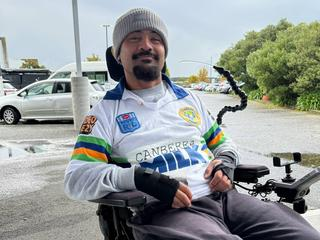

1599 tokens in input
Output:
{'ICD': 'Chapter S00-T88 - Injury, poisoning and certain other consequences of '
        'external causes',
 'ICD10': 'S13.4',
 'age': 'Indeterminate/unknown',
 'age_group': 'Indeterminate/unknown',
 'attractiveness': 70,
 'condition': 'C4 and C5 spinal injury',
 'deservingness': 95,
 'emotional_tone': 'hopeful',
 'ethnicity': 'Māori (based on visual appearance)',
 'face_visible': True,
 'facial_expression': 'smiling',
 'gender': 'Male',
 'image_quality': 'high',
 'image_type': 'portrait',
 'name': 'Ben Stowers',
 'narrative_clarity': 85,
 'narrative_quality': 80,
 'notes': 'Age and age group were not explicitly mentioned in the text, so '
          'they are marked as indeterminate. Ethnicity was inferred from the '
          'image.',
 'region': 'Wellington',
 'sentiment': 70,
 'smiling': True,
 'truth': 95,
 'urgency': 90,
 'use': 'medical expenses, travel expenses, lost wages'}


Input:
https://givealittle.co.nz/cause/hope-for-summer-battensbeater
Title

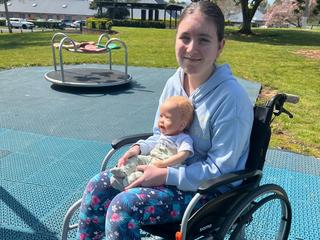

1498 tokens in input
Output:
{'ICD': 'Chapter E00-E89 - Endocrine, nutritional and metabolic diseases',
 'ICD10': 'E75.3',
 'age': 11,
 'age_group': '0-14',
 'attractiveness': 70,
 'condition': 'Batten Disease CLN1',
 'deservingness': 95,
 'emotional_tone': 'hopeful',
 'ethnicity': 'Caucasian (assumed based on image)',
 'face_visible': True,
 'facial_expression': 'smiling',
 'gender': 'Female',
 'image_quality': 'high',
 'image_type': 'portrait',
 'name': 'Summer',
 'narrative_clarity': 85,
 'narrative_quality': 80,
 'notes': 'The text mentions a rare terminal disease with no cure or '
          'treatment, emphasizing the urgency and emotional tone. The image '
          'shows a young girl in a wheelchair holding a baby, which aligns '
          'with the description.',
 'region': 'Nationwide',
 'sentiment': 80,
 'smiling': True,
 'truth': 90,
 'urgency': 95,
 'use': 'medical expenses, experimental therapies, travel expenses, lost wages'}


Input:
https://givealittle.co.nz/cause/help

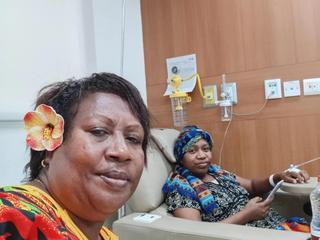

1702 tokens in input
Output:
{'ICD': 'Chapter C00-D49 - Neoplasms',
 'ICD10': 'C50',
 'age': 31,
 'age_group': '15-64',
 'attractiveness': 70,
 'condition': 'Breast Cancer',
 'deservingness': 95,
 'emotional_tone': 'hopeful',
 'ethnicity': 'Pacific Islander (likely)',
 'face_visible': True,
 'facial_expression': 'smiling',
 'gender': 'Female',
 'image_quality': 'high',
 'image_type': 'portrait',
 'name': 'Esther',
 'narrative_clarity': 85,
 'narrative_quality': 80,
 'notes': 'Ethnicity inferred from the image; no explicit mention in text.',
 'region': 'Otago',
 'sentiment': 70,
 'smiling': True,
 'truth': 95,
 'urgency': 90,
 'use': 'medical expenses'}


Input:
https://givealittle.co.nz/cause/savewellwomen
Title: $100k in 100 days!
Pitch: Help save a life saving service for mothers in South Auckland & North Waikato
Description: At Well Women Trust, we walk alongside women through some of the most vulnerable times in their lives. Our free, accessible mental health services continue to g

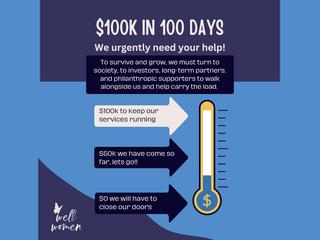

1528 tokens in input
Output:
{'ICD': 'Chapter F01-F99 - Mental, Behavioral and Neurodevelopmental disorders',
 'ICD10': 'F32.9',
 'age': 'Not specified',
 'age_group': 'indeterminate/unknown',
 'attractiveness': 50,
 'condition': 'Mental Health Disorders',
 'deservingness': 95,
 'emotional_tone': 'hopeful',
 'ethnicity': 'Not specified in text; guessing from image: Māori or Pacific '
              'Islander (based on cultural context)',
 'face_visible': False,
 'facial_expression': 'not_detectable',
 'gender': 'Other/unknown',
 'image_quality': 'high',
 'image_type': 'symbolic',
 'name': 'Not specified',
 'narrative_clarity': 85,
 'narrative_quality': 80,
 'notes': 'The text does not specify an individual but rather focuses on a '
          'service for women. Ethnicity was inferred based on the cultural '
          "context of New Zealand and the organization's focus.",
 'region': 'Auckland',
 'sentiment': 70,
 'smiling': False,
 'truth': 95,
 'urgency': 90,
 'use': 'medical expenses,

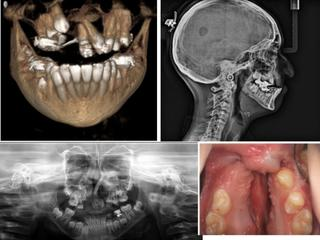

1666 tokens in input
Output:
{'ICD': 'Chapter Q00-Q99 - Congenital malformations, deformations and '
        'chromosomal abnormalities',
 'ICD10': 'Q87.3',
 'age': 14,
 'age_group': '0-14',
 'attractiveness': 50,
 'condition': 'Goldenhar Syndrome',
 'deservingness': 95,
 'emotional_tone': 'hopeful',
 'ethnicity': 'Caucasian (assumed based on image)',
 'face_visible': True,
 'facial_expression': 'not_detectable',
 'gender': 'Female',
 'image_quality': 'medium',
 'image_type': 'symbolic',
 'name': 'Not specified',
 'narrative_clarity': 85,
 'narrative_quality': 80,
 'notes': 'No explicit mention of ethnicity in text, inferred from image.',
 'region': 'Nationwide',
 'sentiment': 70,
 'smiling': False,
 'truth': 90,
 'urgency': 80,
 'use': 'medical expenses'}


time: 2min 22s (started: 2025-06-25 12:47:48 +12:00)


In [9]:
for row in tqdm(df.head(5).itertuples(index=False)):
    print("Input:")
    print(row.uri)
    print(row.text)
    image = Image.open(requests.get(row.hero, stream=True).raw)
    display(image)
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": """
                    The below message is text extracted from givealittle, a crowdfunding platform. It's a health related campaign.
                    I've also included the hero image for the campaign.
                    For the text below, extract the following information, in JSON format:
                    condition: the primary health condition mentioned in the text
                    ICD10: the ICD10 code for the primary health condition
                    ICD: the top level ICD chapter for the primary health condition. One of:
                        Chapter A00-B99 - Certain infectious and parasitic diseases
                        Chapter C00-D49 - Neoplasms
                        Chapter D50-D89 - Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
                        Chapter E00-E89 - Endocrine, nutritional and metabolic diseases
                        Chapter F01-F99 - Mental, Behavioral and Neurodevelopmental disorders
                        Chapter G00-G99 - Diseases of the nervous system
                        Chapter H00-H59 - Diseases of the eye and adnexa
                        Chapter H60-H95 - Diseases of the ear and mastoid process
                        Chapter I00-I99 - Diseases of the circulatory system
                        Chapter J00-J99 - Diseases of the respiratory system
                        Chapter K00-K95 - Diseases of the digestive system
                        Chapter L00-L99 - Diseases of the skin and subcutaneous tissue
                        Chapter M00-M99 - Diseases of the musculoskeletal system and connective tissue
                        Chapter N00-N99 - Diseases of the genitourinary system
                        Chapter O00-O9A - Pregnancy, childbirth and the puerperium
                        Chapter P00-P96 - Certain conditions originating in the perinatal period
                        Chapter Q00-Q99 - Congenital malformations, deformations and chromosomal abnormalities
                        Chapter R00-R99 - Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
                        Chapter S00-T88 - Injury, poisoning and certain other consequences of external causes
                        Chapter V00-Y99 - External causes of morbidity
                        Chapter Z00-Z99 - Factors influencing health status and contact with health services
                        Chapter U00-U85 - Codes for special purposes
                    name: the name of the person this campaign is for
                    gender: the gender of the person this campaign is for, one of Male, Female or Other/unknown
                    age: the age of the person this campaign is for
                    age_group: the age group of the person this campaign is for, one of 0-14, 15-64, 65+ or indeterminate/unknown
                    ethnicity: the ethnicity of the person this campaign is for. If not mentioned in the text, guess their ethnicity from the image.
                    urgency: a number from 0-100, indicating how urgent the need is
                    sentiment: a number from 0-100, indicating the sentiment of the text, where 100 is the most positive, and 0 is the most negative
                    truth: a number from 0-100, indicating how truthful the text is, where 100 is the most truthful, and 0 is the least truthful
                    notes: any additional information about how you processed this text, such as warnings or errors
                    smiling: a boolean indicating whether the person in the image is smiling
                    deservingness: a number from 0-100, indicating how deserving the person is of receiving funds, where 100 is the most deserving, and 0 is the least deserving
                    attractiveness: a number from 0-100, indicating how attractive the person is, where 100 is the most attractive, and 0 is the least attractive
                    use: The main use of the raised funds - one or more (comma separated) of: medical expenses, experimental therapies, travel expenses, lost wages
                    region: The region in New Zealand where the person is located, one of: Northland, Auckland, Waikato, Bay of Plenty, Gisborne, Hawke's Bay, Taranaki, Manuatū-Whanganui, Wellington, Tasman, Nelson, Marlborough, West Coast, Canterbury, Otago, Southland
                    narrative_clarity: a number from 0-100, indicating how clear the narrative is, where 100 is the most clear, and 0 is the least clear
                    narrative_quality: a number from 0-100, indicating how well written the narrative is
                    emotional_tone: grateful | desperate | hopeful | neutral | etc
                    image_type: selfie | portrait | symbolic | environment | group | other
                    face_visible: true | false
                    facial_expression: smiling | neutral | serious | emotional | not_detectable
                    image_quality: high | medium | low

                    Do not include comments in your JSON response. Only respond with the JSON object. Make sure the JSON is valid
                """},
                {
                    "type": "image",
                    "image": row.hero,
                },
                {"type": "text", "text": row.text}
            ]
        }
    ]
    text = processor.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )
    image_inputs, video_inputs = process_vision_info(messages)
    inputs = processor(
        text=[text],
        images=image_inputs,
        videos=video_inputs,
        padding=True,
        return_tensors="pt",
    )
    inputs = inputs.to("cuda")
    print(len(inputs.input_ids[0]), "tokens in input")

    generated_ids = model.generate(**inputs, max_new_tokens=5000)
    generated_ids_trimmed = [
        out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )[0]
    output_text = output_text.replace("```json", "").replace("```", "").strip()
    print("Output:")
    result = json.loads(output_text)
    pprint(result)
    print("\n")